In [22]:
import xgboost
import shap

# train an XGBoost model
X, y = shap.datasets.california()
model = xgboost.XGBRegressor().fit(X, y)

# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn, transformers, Spark, etc.)
explainer = shap.Explainer(model)
shap_values = explainer(X)

In [20]:
# Filter samples where y is at least 5
mask = y >= 5
y_filtered = y[mask]
print(y_filtered)

[5.00001 5.00001 5.00001 5.00001 5.00001 5.00001 5.00001 5.00001 5.00001
 5.00001 5.00001 5.00001 5.00001 5.00001 5.00001 5.00001 5.00001 5.00001
 5.00001 5.00001 5.00001 5.00001 5.00001 5.00001 5.00001 5.00001 5.00001
 5.00001 5.00001 5.00001 5.00001 5.00001 5.00001 5.00001 5.00001 5.00001
 5.00001 5.00001 5.00001 5.00001 5.00001 5.00001 5.00001 5.00001 5.00001
 5.00001 5.00001 5.00001 5.00001 5.00001 5.00001 5.00001 5.00001 5.00001
 5.00001 5.00001 5.00001 5.00001 5.00001 5.00001 5.00001 5.00001 5.00001
 5.00001 5.00001 5.00001 5.00001 5.00001 5.00001 5.00001 5.00001 5.00001
 5.00001 5.00001 5.00001 5.00001 5.00001 5.00001 5.00001 5.00001 5.00001
 5.00001 5.00001 5.00001 5.00001 5.00001 5.00001 5.00001 5.00001 5.00001
 5.00001 5.00001 5.00001 5.00001 5.00001 5.00001 5.00001 5.00001 5.00001
 5.00001 5.00001 5.00001 5.00001 5.00001 5.00001 5.00001 5.00001 5.00001
 5.00001 5.00001 5.00001 5.00001 5.00001 5.00001 5.00001 5.00001 5.00001
 5.00001 5.00001 5.      5.00001 5.00001 5.      5.

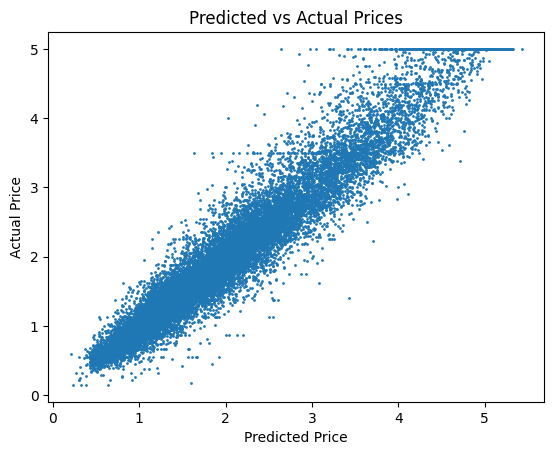

In [19]:
import matplotlib.pyplot as plt

# plot predicted vs actual prices
predicted_prices = model.predict(X)

plt.scatter(predicted_prices, y, s=1)
plt.xlabel("Predicted Price")
plt.ylabel("Actual Price")
plt.title("Predicted vs Actual Prices")
plt.show()

ExactExplainer explainer: 20641it [02:53, 114.25it/s]                           


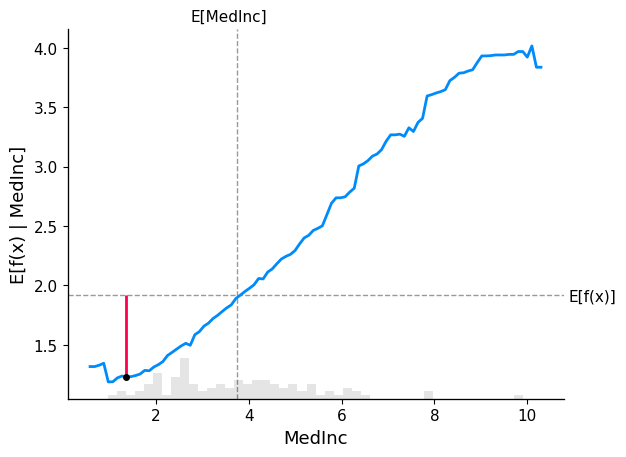

In [39]:
# fit a GAM model to the data
import interpret.glassbox

model_ebm = interpret.glassbox.ExplainableBoostingRegressor(interactions=0)
model_ebm.fit(X, y)

# explain the GAM model with SHAP
explainer_ebm = shap.Explainer(model_ebm.predict, X100)
shap_values_ebm = explainer_ebm(X)



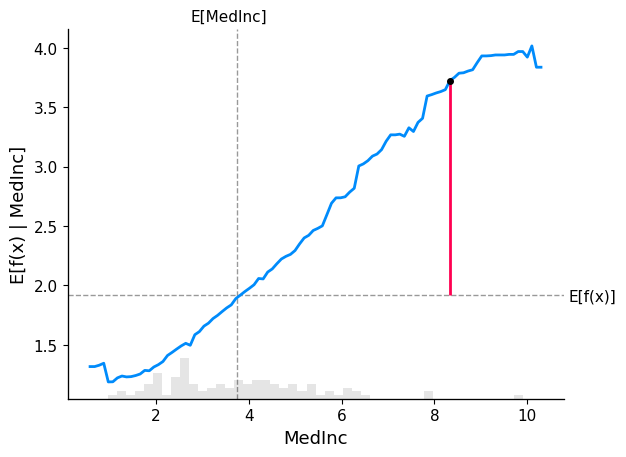

In [40]:
# make a standard partial dependence plot with a single SHAP value overlaid
sample_ind = 0
fig, ax = shap.partial_dependence_plot(
    "MedInc",
    model_ebm.predict,
    X100,
    model_expected_value=True,
    feature_expected_value=True,
    show=False,
    ice=False,
    shap_values=shap_values_ebm[sample_ind : sample_ind + 1, :],
)

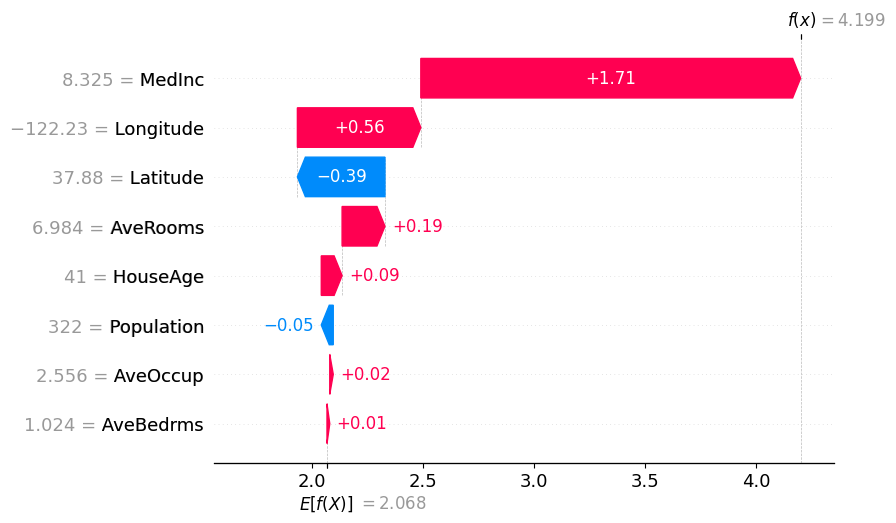

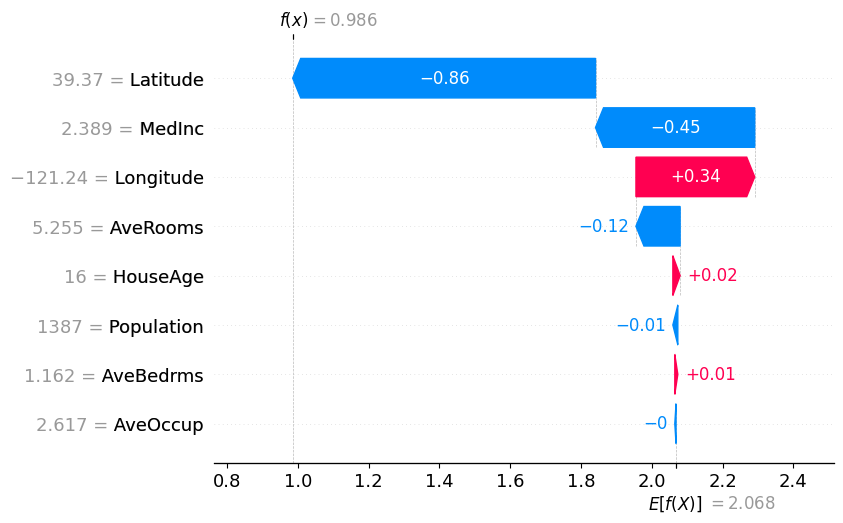

       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       Longitude  
0        -122.23  
1

In [11]:
# visualize the first prediction's explanation
shap.plots.waterfall(shap_values[0])
shap.plots.waterfall(shap_values[20639])
print(X)
print(y)

In [3]:
# visualize the first prediction's explanation with a force plot
shap.plots.force(shap_values[0])

In [4]:
# visualize all the training set predictions
shap.plots.force(shap_values)

shap.plots.force is slow for many thousands of rows, try subsampling your data.


In [3]:
# create a dependence scatter plot to show the effect of a single feature across the whole dataset
shap.plots.scatter(shap_values[:,"RM"], color=shap_values)

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

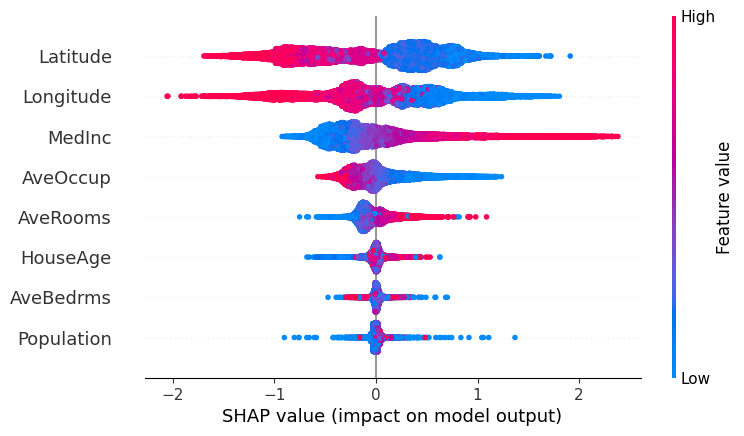

In [5]:
# summarize the effects of all the features
shap.plots.beeswarm(shap_values)

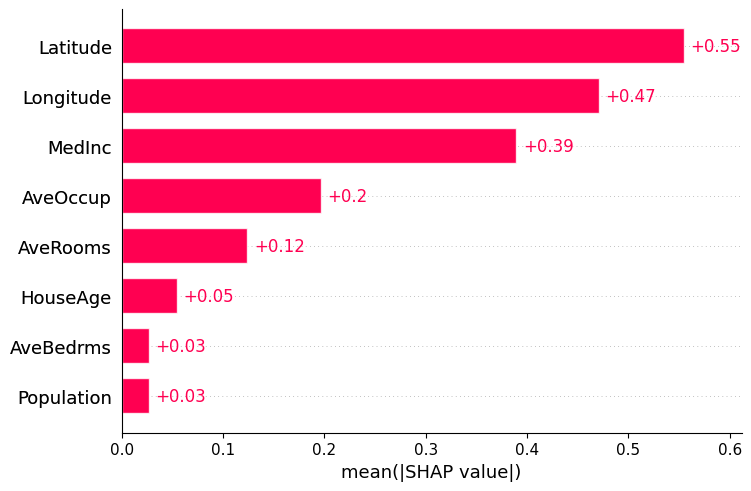

In [4]:
shap.plots.bar(shap_values)